In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

import tensorflow as tf
tf.__version__

'2.3.1'

In [30]:
np.random.seed(10)
tf.compat.v1.set_random_seed(10)

In [31]:
df_koi = pd.read_csv("./mast-info.csv", skiprows=53)
df_koi

,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,10090151,K07985.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,1,0,...,-166.0,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
9560,10128825,K07986.01,NaN,CANDIDATE,CANDIDATE,0.497,0,0,0,0,...,-220.0,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757
9561,10147276,K07987.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.021,0,0,1,0,...,-236.0,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385
9562,10155286,K07988.01,NaN,CANDIDATE,CANDIDATE,0.092,0,0,0,0,...,-128.0,2.992,0.030,-0.027,7.824,0.223,-1.896,296.76288,47.145142,10.998


In [32]:
# Cargo los csv
df_local = pd.read_csv("./unified-lightcurves-local.csv").iloc[:, 1:]
df_global = pd.read_csv("./unified-lightcurves-global.csv").iloc[:, 1:]
df_stellar = pd.read_csv("./unified-stellar-params.csv").iloc[:, 1:]

display(df_local)
display(df_global)
display(df_stellar)

,kepid,kepler_name,kepoi_name,koi_disposition,light_flux_0001,light_flux_0002,light_flux_0003,light_flux_0004,light_flux_0005,light_flux_0006,...,light_flux_0092,light_flux_0093,light_flux_0094,light_flux_0095,light_flux_0096,light_flux_0097,light_flux_0098,light_flux_0099,light_flux_0100,light_flux_0101
0,10797460.0,Kepler-227 b,K00752.01,1,1.727321,0.728728,1.125654,1.229677,1.327881,1.390140,...,1.318587,1.390135,0.968716,1.285568,1.216662,0.874477,1.627442,0.960296,0.998560,1.489279
1,10811496.0,NaN,K00753.01,0,1.044298,0.961948,1.000986,0.983043,0.983156,1.037890,...,1.023945,0.999707,0.986407,0.980490,1.018677,0.976698,0.933617,1.067080,1.002989,1.012337
2,10848459.0,NaN,K00754.01,0,-0.289601,-0.370998,-0.441931,-0.410758,-0.379353,-0.507287,...,-0.445697,-0.442599,-0.365730,-0.381951,-0.287742,-0.285504,-0.269432,-0.261419,-0.224786,-0.308863
3,10854555.0,Kepler-664 b,K00755.01,1,-0.066347,-0.019535,0.481834,-0.052898,-0.000501,0.402655,...,-0.620233,-0.403630,-0.347501,-0.388085,-0.302855,-0.130258,-0.042718,0.674248,-0.583962,0.165856
4,10872983.0,Kepler-228 d,K00756.01,1,0.910853,0.953313,1.121489,0.641881,1.222616,0.878186,...,1.040783,0.863073,1.246061,0.969055,1.318099,1.276269,1.092889,0.842558,1.081244,0.972349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6090,10031643.0,NaN,K07984.01,0,1.326015,-0.237976,1.031217,1.533878,0.628377,1.317783,...,0.231072,0.877314,1.741571,1.331278,1.134218,1.485683,0.323981,-0.605954,0.691033,1.012538
6091,10090151.0,NaN,K07985.01,0,-0.818461,-0.582961,-0.804967,-0.881438,-0.608308,-0.630170,...,-0.821112,-0.787683,-0.549940,-0.806678,-0.688768,-0.796852,-0.617750,-0.695399,-0.710079,-0.551582
6092,10128825.0,NaN,K07986.01,0,-0.202417,-0.490636,0.925138,0.894101,1.454064,-0.070774,...,1.194394,-0.265945,-0.643078,0.907540,1.074063,1.982618,0.704504,1.937049,0.038070,1.604524
6093,10147276.0,NaN,K07987.01,0,0.650887,0.889116,0.758458,0.425697,0.726841,1.090262,...,0.987756,0.594261,0.684510,1.125490,0.726558,0.479359,-0.267394,0.273248,1.216787,0.561130


,kepid,kepler_name,kepoi_name,koi_disposition,light_flux_0001,light_flux_0002,light_flux_0003,light_flux_0004,light_flux_0005,light_flux_0006,...,light_flux_0992,light_flux_0993,light_flux_0994,light_flux_0995,light_flux_0996,light_flux_0997,light_flux_0998,light_flux_0999,light_flux_1000,light_flux_1001
0,10797460.0,Kepler-227 b,K00752.01,1,0.832189,0.435614,1.357075,1.108348,1.650665,1.129287,...,0.713763,1.274681,1.154911,2.088258,1.059249,0.848340,1.142176,0.961584,0.966640,1.044353
1,10811496.0,NaN,K00753.01,0,0.966682,0.964235,0.970539,0.937743,0.975104,1.039065,...,0.943850,0.965717,0.990491,0.982717,0.985906,0.961670,1.043547,0.983126,1.040699,1.040926
2,10848459.0,NaN,K00754.01,0,1.034104,0.982172,1.048199,1.078219,0.983764,0.992431,...,0.946015,1.010975,1.011789,1.055202,1.038121,1.044473,1.071489,1.053268,1.033189,1.005258
3,10854555.0,Kepler-664 b,K00755.01,1,0.975071,1.225692,1.269809,1.771289,1.312162,1.097620,...,1.335065,1.179038,1.002768,1.017255,0.823422,0.561212,1.035374,0.835232,1.615619,1.464552
4,10872983.0,Kepler-228 d,K00756.01,1,1.394998,1.185855,0.932441,1.230771,0.940595,0.909058,...,0.864800,0.850251,1.086740,1.073562,0.930443,0.857681,1.232381,1.297968,1.208948,1.079670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6090,10031643.0,NaN,K07984.01,0,0.175475,1.504283,1.318089,0.769620,0.666730,1.008246,...,1.378201,1.927068,1.984925,1.130322,1.202864,0.781321,0.045358,0.647927,1.207362,1.101768
6091,10090151.0,NaN,K07985.01,0,0.747230,0.915918,1.031489,0.989710,1.021699,0.867820,...,0.755320,0.876177,0.913214,0.960485,1.017231,0.789195,0.809078,0.774575,0.872496,0.802597
6092,10128825.0,NaN,K07986.01,0,0.714833,1.610737,0.196081,0.533665,1.053996,0.873009,...,1.082519,1.101279,1.060959,1.446257,1.603752,0.875442,1.295145,1.852598,0.230911,0.803615
6093,10147276.0,NaN,K07987.01,0,1.486451,1.733356,0.993478,0.776943,0.226574,0.407813,...,0.898611,1.483079,1.160034,0.921238,1.509204,-0.560163,0.666612,1.113881,2.175872,2.393636


,kepid,koi_disposition,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag
0,10797460,1,9.488036,170.538750,0.146,2.95750,615.8,2.26,793.0,93.59,35.8,5455.0,4.467,0.927,291.93423,48.141651,15.347
1,10811496,0,19.899140,175.850252,0.969,1.78220,10829.0,14.60,638.0,39.30,76.3,5853.0,4.544,0.868,297.00482,48.134129,15.436
2,10848459,0,1.736952,170.307565,1.276,2.40641,8079.2,33.46,1395.0,891.96,505.6,5805.0,4.564,0.791,285.53461,48.285210,15.597
3,10854555,1,2.525592,171.595550,0.701,1.65450,603.3,2.75,1406.0,926.16,40.9,6031.0,4.438,1.046,288.75488,48.226200,15.509
4,10872983,1,11.094321,171.201160,0.538,4.59450,1517.5,3.90,835.0,114.81,66.5,6046.0,4.486,0.972,296.28613,48.224670,15.714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6090,10031643,0,8.589871,132.016100,0.765,4.80600,87.7,1.11,929.0,176.40,8.4,5638.0,4.296,1.088,298.74921,46.973351,14.478
6091,10090151,0,0.527699,131.705093,1.252,3.22210,1579.2,29.35,2088.0,4500.53,453.3,5638.0,4.529,0.903,297.18875,47.093819,14.082
6092,10128825,0,1.739849,133.001270,0.043,3.11400,48.5,0.72,1608.0,1585.81,10.6,6119.0,4.444,1.031,286.50937,47.163219,14.757
6093,10147276,0,0.681402,132.181750,0.147,0.86500,103.6,1.07,2218.0,5713.41,12.3,6173.0,4.447,1.041,294.16489,47.176281,15.385


In [33]:
local_fluxes = df_local.iloc[:,4:]
local_labels = df_local.iloc[:,3]

global_fluxes = df_global.iloc[:,4:]
global_labels = df_global.iloc[:,3]

# stellar_infos = df_stellar.iloc[:,2:] # de todo
stellar_infos = df_stellar.iloc[:,11:14] # solo parametros estelares
stellar_labels = df_stellar.iloc[:,1]

In [34]:
display(stellar_infos)

# esto es porque no estas normalizado los datos estelares
x = stellar_infos.values
x_scaled = MinMaxScaler().fit_transform(x)
stellar_infos = pd.DataFrame(x_scaled)

display(stellar_infos)

,koi_steff,koi_slogg,koi_srad
0,5455.0,4.467,0.927
1,5853.0,4.544,0.868
2,5805.0,4.564,0.791
3,6031.0,4.438,1.046
4,6046.0,4.486,0.972
...,...,...,...
6090,5638.0,4.296,1.088
6091,5638.0,4.529,0.903
6092,6119.0,4.444,1.031
6093,6173.0,4.447,1.041


,0,1,2
0,0.321186,0.831296,0.005030
1,0.366939,0.845778,0.004667
2,0.361421,0.849539,0.004194
3,0.387401,0.825842,0.005762
4,0.389125,0.834869,0.005307
...,...,...,...
6090,0.342223,0.799135,0.006020
6091,0.342223,0.842957,0.004883
6092,0.397517,0.826970,0.005670
6093,0.403725,0.827534,0.005731


## Particionado de datos

In [35]:
x_local_train, x_local_test, y_local_train, y_local_test = train_test_split(
    local_fluxes, local_labels, test_size=0.3, random_state=11)
    
x_global_train, x_global_test, y_global_train, y_global_test = train_test_split(
    global_fluxes, global_labels, test_size=0.3, random_state=11)
    
x_stellar_train, x_stellar_test, y_stellar_train, y_stellar_test = train_test_split(
    stellar_infos, stellar_labels, test_size=0.3, random_state=11)
    

In [36]:
print('x_local_train =', x_local_train.shape, 'x_local_test =', x_local_test.shape, 'y_local_train =', y_local_train.shape, 'y_local_test =', y_local_test.shape)
print('x_global_train =', x_global_train.shape, 'x_global_test =', x_global_test.shape, 'y_global_train =', y_global_train.shape, 'y_global_test =', y_global_test.shape)
print('x_stellar_train =', x_stellar_train.shape, 'x_stellar_test =', x_stellar_test.shape, 'y_stellar_train =', y_stellar_train.shape, 'y_stellar_test =', y_stellar_test.shape)

x_local_train = (4266, 101) x_local_test = (1829, 101) y_local_train = (4266,) y_local_test = (1829,)
x_global_train = (4266, 1001) x_global_test = (1829, 1001) y_global_train = (4266,) y_global_test = (1829,)
x_stellar_train = (4266, 3) x_stellar_test = (1829, 3) y_stellar_train = (4266,) y_stellar_test = (1829,)


In [37]:
#Definimos las dimensiones
n_outputs = 1
n_local_timesteps, n_local_features  = x_local_train.shape[0], x_local_train.shape[1]
n_global_timesteps, n_global_features  = x_global_train.shape[0], x_global_train.shape[1]
n_stellar_timesteps, n_stellar_features  = x_stellar_train.shape[0], x_stellar_train.shape[1]

In [38]:
print(n_local_timesteps, n_local_features)
print(n_global_timesteps, n_global_features)
print(n_stellar_timesteps, n_stellar_features)

4266 101
4266 1001
4266 3


In [39]:
#Expandimos las dimensiones de train 
x_local_extended_train = np.expand_dims(x_local_train,axis=-1) 
y_local_extended_train = np.array(y_local_train)

x_global_extended_train = np.expand_dims(x_global_train,axis=-1)
y_global_extended_train = np.array(y_global_train)

x_stellar_extended_train = np.expand_dims(x_stellar_train,axis=-1)
y_stellar_extended_train = np.array(y_stellar_train)

In [40]:
print(x_local_train.shape, y_local_train.shape)
print(x_local_extended_train.shape, y_local_extended_train.shape)

print(x_global_train.shape, y_global_train.shape)
print(x_global_extended_train.shape, y_global_extended_train.shape)

print(x_stellar_train.shape, y_stellar_train.shape)
print(x_stellar_extended_train.shape, y_stellar_extended_train.shape)

(4266, 101) (4266,)
(4266, 101, 1) (4266,)
(4266, 1001) (4266,)
(4266, 1001, 1) (4266,)
(4266, 3) (4266,)
(4266, 3, 1) (4266,)


In [41]:
#Expandimos las dimensiones de test
x_local_extended_test = np.expand_dims(x_local_test,axis=-1)
y_local_extended_test = np.array(y_local_test)

x_global_extended_test = np.expand_dims(x_global_test,axis=-1)
y_global_extended_test = np.array(y_global_test)

x_stellar_extended_test = np.expand_dims(x_stellar_test,axis=-1)
y_stellar_extended_test = np.array(y_stellar_test)

In [42]:
print(x_local_test.shape, y_local_test.shape)
print(x_local_extended_test.shape, y_local_extended_test.shape)

(1829, 101) (1829,)
(1829, 101, 1) (1829,)


## Construcción Red Neuronal

### Red para vistas locales

In [43]:
# first input model
inputLocalView = tf.keras.layers.Input(shape=(n_local_features, 1))
inputLocalView.set_shape([n_local_timesteps, n_local_features, 1]) # 4266 x 101

CL1 = tf.keras.layers.Conv1D(filters=16, kernel_size=5, activation='relu')(inputLocalView)
CL2 = tf.keras.layers.Conv1D(filters=16, kernel_size=5, activation='relu')(CL1)

ML1 = tf.keras.layers.MaxPooling1D(pool_size=7, strides=2)(CL2)

CL3 = tf.keras.layers.Conv1D(filters=32, kernel_size=5, activation='relu')(ML1)
CL4 = tf.keras.layers.Conv1D(filters=32, kernel_size=5, activation='relu')(CL3)

ML2 = tf.keras.layers.MaxPooling1D(pool_size=7, strides=2)(CL4)

flat1 = tf.keras.layers.Flatten()(ML2)

### Red para vistas globales

In [44]:
inputGlobalView = tf.keras.layers.Input(shape=(n_global_features, 1))
inputGlobalView.set_shape([n_global_timesteps, n_global_features, 1])  # 4266 x 1001


CG1 = tf.keras.layers.Conv1D(filters=16, kernel_size=5, activation='relu')(inputGlobalView)
CG2 = tf.keras.layers.Conv1D(filters=16, kernel_size=5, activation='relu')(CG1)

MG1 = tf.keras.layers.MaxPooling1D(pool_size=3, strides=2)(CG2)

CG3 = tf.keras.layers.Conv1D(filters=32, kernel_size=5, activation='relu')(MG1)
CG4 = tf.keras.layers.Conv1D(filters=32, kernel_size=5, activation='relu')(CG3)

MG2 = tf.keras.layers.MaxPooling1D(pool_size=2, strides=2)(CG4)

CG5 = tf.keras.layers.Conv1D(filters=64, kernel_size=5, activation='relu')(MG2)
CG6 = tf.keras.layers.Conv1D(filters=64, kernel_size=5, activation='relu')(CG5)

MG3 = tf.keras.layers.MaxPooling1D(pool_size=2, strides=2)(CG6)

CG7 = tf.keras.layers.Conv1D(filters=128, kernel_size=5, activation='relu')(MG3)
CG8 = tf.keras.layers.Conv1D(filters=128, kernel_size=5, activation='relu')(CG7)

MG4 = tf.keras.layers.MaxPooling1D(pool_size=2, strides=2)(CG8)

CG9 = tf.keras.layers.Conv1D(filters=128, kernel_size=5, activation='relu')(MG4)
CG10 = tf.keras.layers.Conv1D(filters=256, kernel_size=5, activation='relu')(CG9)

MG5 = tf.keras.layers.MaxPooling1D(pool_size=2, strides=2)(CG10)

flat2 = tf.keras.layers.Flatten()(MG5)

### Red para parámetros estelares

In [45]:
"""
StellarParam6PInput = tf.keras.layers.InputLayer(input_shape=(n_stellar_features, 1))
StellarParam6PInput.set_shape([n_stellar_timesteps, n_stellar_features, 1])  # 4266 x 3

# StellarParam6PInput=(n_stellar_features,1)
flat3 = tf.keras.layers.Flatten()(StellarParam6PInput)
"""

'\nStellarParam6PInput = tf.keras.layers.InputLayer(input_shape=(n_stellar_features, 1))\nStellarParam6PInput.set_shape([n_stellar_timesteps, n_stellar_features, 1])  # 4266 x 3\n\n# StellarParam6PInput=(n_stellar_features,1)\nflat3 = tf.keras.layers.Flatten()(StellarParam6PInput)\n'

### Unificación de redes

In [46]:
output_activation = 'relu' # tanh / sigmoid / relu #
output_optimizer = 'adam' # adam / adamax #
rrnn = 'gobal-and-local'

basefolder = "trainings/" + rrnn + "_" + output_activation + "-" + output_optimizer 
basepath = basefolder + "/" + rrnn + "_" + output_activation + "-" + output_optimizer

In [47]:
# merge input models
merge = tf.keras.layers.concatenate([flat1, flat2])
# merge = tf.keras.layers.concatenate([flat1, flat2, flat3])

# interpretation model
hidden1 = tf.keras.layers.Dense(256, activation='relu')(merge)
hidden2 = tf.keras.layers.Dense(256, activation='relu')(hidden1)
hidden3 = tf.keras.layers.Dense(256, activation='relu')(hidden2)
hidden4 = tf.keras.layers.Dense(256, activation='relu')(hidden3)

output = tf.keras.layers.Dense(n_outputs, activation=output_activation)(hidden4)

model = tf.keras.Model(inputs=[inputLocalView,inputGlobalView], outputs=output)
# model = tf.keras.Model(inputs=[inputLocalView,inputGlobalView,StellarParam6PInput], outputs=output)
model.compile(loss='binary_crossentropy', optimizer=output_optimizer, metrics=['accuracy'])

print(model.summary())

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(4266, 1001, 1)]    0                                            
__________________________________________________________________________________________________
conv1d_18 (Conv1D)              (4266, 997, 16)      96          input_4[0][0]                    
__________________________________________________________________________________________________
conv1d_19 (Conv1D)              (4266, 993, 16)      1296        conv1d_18[0][0]                  
__________________________________________________________________________________________________
max_pooling1d_9 (MaxPooling1D)  (4266, 496, 16)      0           conv1d_19[0][0]                  
_______________________________________________________________________________________

## ENTRENAMIENTO DEL MODELO

In [48]:
# Establecemos callbacks para guardad los pasos
checkpoint_path = basepath + "-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path, 
    verbose=0, 
    save_weights_only=True,
    save_freq='epoch'
)

os.makedirs(checkpoint_dir, exist_ok=True)

In [49]:
# checkpoint_path.format(epoch=0)
latest = tf.train.latest_checkpoint(basefolder)
latest

In [50]:
if latest:
    model.load_weights(latest)
else :
    # divisores 4266: 1, 2, 3, 6, 9, 18, 27, 54, 79, 158, 237, 474, 711, 1422, 2133, 4266
    bs = 237
    Ajuste = model.fit(
        [x_local_extended_train, x_global_extended_train, x_stellar_extended_train], 
        y_local_extended_train, 
        epochs=50, 
        batch_size=bs,
        
        # validation_data=(test_images,test_labels),
        callbacks=[cp_callback],

    )

Epoch 1/50
18/18 [==============================] - 14s 800ms/step - loss: 0.7344 - accuracy: 0.7171
Epoch 2/50
18/18 [==============================] - 13s 721ms/step - loss: 0.5090 - accuracy: 0.7595
Epoch 3/50
18/18 [==============================] - 14s 801ms/step - loss: 0.5005 - accuracy: 0.7625
Epoch 4/50
18/18 [==============================] - 16s 908ms/step - loss: 0.4835 - accuracy: 0.7815
Epoch 5/50
18/18 [==============================] - 22s 1s/step - loss: 0.4582 - accuracy: 0.7970
Epoch 6/50
18/18 [==============================] - 20s 1s/step - loss: 0.4438 - accuracy: 0.8033
Epoch 7/50
18/18 [==============================] - 20s 1s/step - loss: 0.4818 - accuracy: 0.7876
Epoch 8/50
18/18 [==============================] - 15s 821ms/step - loss: 0.4569 - accuracy: 0.7944
Epoch 9/50
18/18 [==============================] - 24s 1s/step - loss: 0.4369 - accuracy: 0.8143
Epoch 10/50
18/18 [==============================] - 30s 2s/step - loss: 0.4152 - accuracy: 0.8155
Epoc

## PREDICCIÓN Y ANÁLISIS

In [51]:
def pintar_matriz_confusion(conf_matx):
    df_cm = pd.DataFrame(conf_matx, index = [i for i in "01"],
                    columns = [i for i in "01"])

    plt.figure(0.5)
    heat_map = sn.heatmap(df_cm, xticklabels=True, yticklabels=True, annot=True, annot_kws = {"ha": 'center'})
    #heat_map.set_yticklabels(heat_map.get_yticklabels(), rotation=0)
    plt.xlabel('Predicción')
    plt.ylabel('Real')


def pintar_roc_curve(fp,tp):
    plt.figure(1)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fp, tp, label='CNN (area = {:.3f})'.format(area_under_curve))
    plt.scatter(fp[ix], tp[ix], marker='o', color='black', label='Best')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc='best')

In [52]:
y_pred_keras_raw = model.predict([x_local_extended_test,x_global_extended_test])
y_pred_keras = y_pred_keras_raw.ravel() # flatten as array

y_pred_keras_standart = (y_pred_keras >= 0.5).astype(np.int)

display(y_pred_keras_raw)
display(y_pred_keras_standart)

array([[0.4546862 ],
       [0.18408473],
       [0.23129697],
       ...,
       [0.06623174],
       [0.        ],
       [0.        ]], dtype=float32)

array([0, 0, 0, ..., 0, 0, 0])

In [53]:
# Exactitud
accuracy = accuracy_score(y_local_extended_test, y_pred_keras_standart)
print("accuracy =", accuracy)

# Precisión
average_precision = average_precision_score(y_local_extended_test, y_pred_keras_standart)
print("average_precision =", average_precision)

# Recall
recall = recall_score(y_local_extended_test, y_pred_keras_standart, average=None)
print("recall =", recall)

# F1
f1 = f1_score(y_local_extended_test, y_pred_keras_standart)
print("f1 =", f1)


accuracy = 0.8075451066156369
average_precision = 0.4443023317014059
recall = [0.94852941 0.39872068]
f1 = 0.515151515151515


Best Threshold=0.227396, G-Mean=0.747
area_under_curve (AUC) =  0.8268013921986705


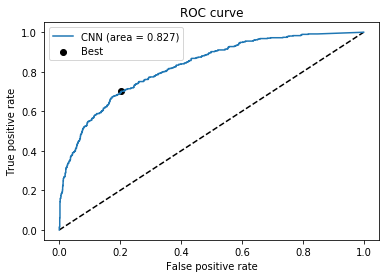

In [54]:
# Defino las métricas
false_positives, true_positives, thresholds = roc_curve(y_local_extended_test, y_pred_keras)
area_under_curve = auc(false_positives, true_positives)
gmeans = np.sqrt(true_positives * (1-false_positives))

# localiza el índice del mayor g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
print("area_under_curve (AUC) = ", area_under_curve)
pintar_roc_curve(false_positives, true_positives)


conf_matrix =
 [[1290   70]
 [ 282  187]]


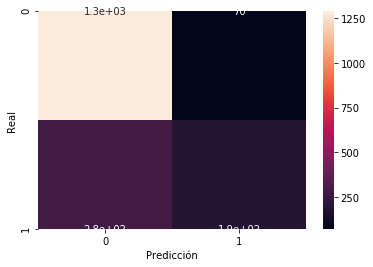

In [55]:
conf_matrix = confusion_matrix(y_local_extended_test, y_pred_keras_standart)
print("conf_matrix =\n", conf_matrix)

pintar_matriz_confusion(conf_matrix)

pd.DataFrame(conf_matrix).to_csv(basepath + '_confusionmatrix.csv')

In [56]:
#Umbral estándar
PhiM_Standart = matthews_corrcoef(y_local_extended_test, y_pred_keras_standart)
print("PhiM_Standart =", PhiM_Standart)

PhiM_Standart = 0.43632029585813564
